In [1]:
import cv2
import numpy as numpy
import matplotlib.pyplot as plt

In [2]:
#Load pre-trained Haar-Cascade class of frontal face and eye 
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [3]:
#Function detects face and eyes
def detection(cascade1, cascade2, original_image, scaleFactor = 1.3):
    # make a copy of the original image to avoid changes in the original image
    image = original_image.copy()
    
    #convert the copied image to grayscale since OpenCV works with grayscale image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Applying the Haar classifiers to detect faces in the image
    faces = cascade1.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors = 5)
    print('# of faces detected: ', len(faces))

    #draw a rectangle around faces detected
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 2)
        roi_gray = gray_image[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

        # Applying the Haar classifiers to detect eyes in the image
        eyes = cascade2.detectMultiScale(roi_gray)
        #draw a rectangle around eyes detected
        for (x1, y1, w1, h1) in eyes:
            cv2.rectangle(roi_color, (x1, y1), (x1+w1, y1+h1), (255, 255, 255), 2)
        
    return image

In [4]:
#Function converts grayscale image to RGB color image
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
image1 = cv2.imread("dataset/selfie_resized.jpg")

In [6]:
face1 = detection(face_cascade, eye_cascade, image1)

# of faces detected:  1


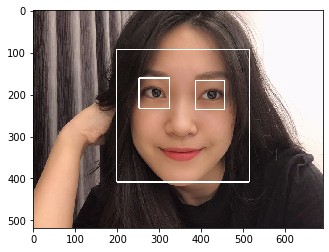

In [7]:
plt.imshow(convertToRGB(face1))